In [6]:
import mpld3
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.decomposition import PCA
from astropy.table import Table
import pandas as pd

In [3]:
# helpers
def flagOn(value, flag):
    return (value & flag) == flag

In [85]:
# Create a dataset of all the lightcurves in s0017/0000/0000/05*
mask = None
data_dict = {}
for path in glob('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/13*/*/*.fits'):
    with fits.open(path) as fits_file:
        # series = pd.Series(fits_data[1].data['SAP_FLUX'].byteswap().newbyteorder(), index=fits_data[1].data['TIME'])
        dat = Table.read(fits_file)
        pd_dat = dat.to_pandas()
        data_dict[fits_file[0].header['OBJECT']] = pd_dat['SAP_FLUX']
        if mask is None:
            mask = flagOn(pd_dat['QUALITY'], 4096)
        else:
            mask &= flagOn(pd_dat['QUALITY'], 4096)
print(mask)
df = pd.DataFrame(data_dict)


0       True
1       True
2       True
3       True
4       True
        ... 
1125    True
1126    True
1127    True
1128    True
1129    True
Name: QUALITY, Length: 1130, dtype: bool


In [73]:

with open('scratch2.txt', 'w') as f:
    f.write(mask.to_csv())
mask.to_csv()

/apps/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/apps/python/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


'0,True\n1,True\n2,True\n3,True\n4,True\n5,True\n6,True\n7,True\n8,True\n9,True\n10,True\n11,True\n12,True\n13,True\n14,True\n15,True\n16,True\n17,True\n18,True\n19,True\n20,True\n21,True\n22,True\n23,True\n24,True\n25,True\n26,True\n27,True\n28,True\n29,True\n30,True\n31,True\n32,True\n33,True\n34,True\n35,True\n36,True\n37,True\n38,True\n39,True\n40,True\n41,True\n42,True\n43,True\n44,True\n45,True\n46,True\n47,True\n48,True\n49,True\n50,True\n51,True\n52,True\n53,True\n54,True\n55,True\n56,True\n57,True\n58,True\n59,True\n60,True\n61,True\n62,True\n63,True\n64,True\n65,True\n66,True\n67,True\n68,True\n69,True\n70,True\n71,True\n72,True\n73,True\n74,True\n75,True\n76,True\n77,True\n78,True\n79,True\n80,True\n81,True\n82,True\n83,False\n84,False\n85,True\n86,False\n87,False\n88,False\n89,False\n90,False\n91,False\n92,False\n93,False\n94,False\n95,False\n96,False\n97,False\n98,True\n99,False\n100,False\n101,False\n102,False\n103,False\n104,False\n105,False\n106,True\n107,False\n108,Fal

In [86]:
df

,TIC 13830366,TIC 13830369,TIC 13830001,TIC 13830344,TIC 13830135,TIC 13830111,TIC 13830096,TIC 13830039,TIC 13830307,TIC 13830259,...,TIC 13113965,TIC 13113453,TIC 13112406,TIC 13110821,TIC 13111970,TIC 13112885,TIC 13112162,TIC 13111637,TIC 13111470,TIC 13111693
0,1.012281,1.003638,1.002402,1.002169,0.999667,1.002604,1.003065,1.008165,0.999898,0.945220,...,1.002168,1.003973,0.998935,1.007467,1.127235,1.000043,1.001858,1.002619,1.000028,1.004521
1,1.012679,1.003653,1.000714,1.002333,1.001498,1.001517,1.002687,1.006204,1.000343,0.950965,...,1.000287,1.008481,1.000423,1.009457,1.122869,1.003656,1.002597,1.000504,1.002422,1.004924
2,1.016533,1.005916,1.000445,1.001156,0.999963,0.999570,1.002212,1.005029,1.000546,0.950229,...,1.000586,0.996070,0.999735,1.006007,1.116131,1.000918,0.999645,1.002679,1.001104,1.004561
3,1.015061,1.004358,1.001711,1.002157,0.999092,1.000055,1.002472,1.005777,1.000351,0.953189,...,1.001141,1.007041,0.999845,1.000568,1.109491,1.008898,1.001555,0.995811,1.001790,1.003746
4,1.010968,1.002407,1.001157,1.000887,0.996182,0.998419,1.002225,1.004632,1.001714,0.955200,...,0.999848,0.999862,1.000851,1.001582,1.104364,0.998803,1.001333,1.004467,1.001465,1.001216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,0.997610,1.017503,1.020265,0.996443,3.106347,1.020002,1.002512,1.024496,1.003714,1.022824,...,1.004475,1.466733,1.002454,0.990867,0.949471,0.974389,0.981246,0.982066,0.975660,0.986542
1126,1.009697,1.016525,1.017365,1.006642,2.729927,0.999801,1.002230,1.011121,1.025204,1.010034,...,0.996638,1.382316,1.001174,0.981641,0.954199,0.971353,0.995777,1.001543,0.983083,0.995103
1127,1.002264,1.010334,1.016749,1.005829,2.381358,0.996570,1.002642,1.005615,1.014575,1.006045,...,1.001697,1.292123,1.003537,0.996780,0.946641,0.969264,1.004003,0.991956,0.980888,0.993353
1128,1.013151,1.011047,1.013288,1.003127,2.041804,0.988715,1.003584,0.990322,1.002361,0.998228,...,1.001365,1.252767,1.003023,0.993470,0.946349,0.974125,1.004026,1.009486,0.987001,0.991654


In [87]:
df.shape

(1130, 4004)

In [88]:
df_masked = df[~mask]

In [89]:
from sklearn.impute import SimpleImputer
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=1)
imputed_sample = imp_constant.fit_transform(df_masked.transpose())

In [90]:
pca = PCA(n_components=2)
sample_after_pca = pca.fit(imputed_sample).transform(imputed_sample)

In [91]:
sample_after_pca.shape

(4004, 2)

In [92]:
pca.explained_variance_ratio_

array([0.42169684, 0.29174346], dtype=float32)

In [93]:

labels = list(df.columns)
fig = plt.figure()
scatter = plt.scatter(
    sample_after_pca[:, 0], sample_after_pca[:, 1], s=5, label=labels
)

plt.title("PCA of lightcurves in s0017/0000/0000/13*")

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

Outliers are:
* (bottom right) TIC 5614834 https://exofop.ipac.caltech.edu/tess/target.php?id=5615395
* (top left) TIC 5615053 https://exofop.ipac.caltech.edu/tess/target.php?id=5615165

(0.99, 1.01)

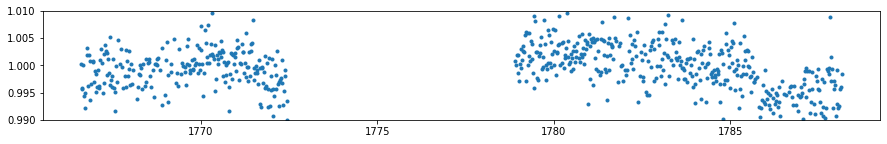

In [95]:
rando = fits.open('/srv/scratch/astro/z3529659/qlp/s0017/0000/0000/1386/2392/hlsp_qlp_tess_ffi_s0017-0000000013862392_tess_v01_llc.fits')
dat = Table.read(rando)
pd = dat.to_pandas()
pd = pd[~flagOn(pd['QUALITY'], 4096)]

plt.figure(figsize=(15,2))
sf = pd['SAP_FLUX'].tolist()
t = pd['TIME'].tolist()

plt.plot(t, sf, '.')
plt.ylim(0.99, 1.01)